In [1]:
%matplotlib inline
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import scipy.misc
import scipy.ndimage
from IPython.display import clear_output
import pandas as pd
import ast
import PIL
from PIL import Image
from torchvision import models
import time
import glob
from skimage.transform import resize
from torchray.utils import imsmooth
from HiPe import hierarchical_perturbation


In /anaconda/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /anaconda/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /anaconda/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /anaconda/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /anaconda/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.jpeg_

In [4]:

transform_n = transforms.Compose([            
 transforms.Resize(256),                    
 transforms.ToTensor(),                     
 transforms.Normalize(mean=[0.485, 0.456, 0.406],std=[0.229, 0.224, 0.225])
])

transform = transforms.Compose([            
 transforms.Resize(256),                    
 transforms.ToTensor(),                     
])

PATH = './imgnet_net.pth'

with open('imagenet_classes.txt') as f:
    classes = [line.split(' ')[-1].strip() for line in f.readlines()]

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        
        self.net = models.vgg16(pretrained=True)
    
    def forward(self, x):
        return torch.nn.functional.softmax(self.net(x), dim=1)

net = Net().eval()


In [13]:
img = Image.open('bee.jpg')

c_img = transform(img).permute(1, 2, 0)
ti = torch.unsqueeze(transform_n(img), 0)

outputs = net(ti)[0]
p_class = torch.argmax(outputs).detach().numpy()
conf = int(max(outputs) * 100)
pred = classes[p_class]
print(pred)
smap, occs = hierarchical_perturbation(net, ti, p_class, resize=None, batch_size=1)


bee
Selected 81/81 masks at depth 1
Selected 33/289 masks at depth 2
Selected 41/1089 masks at depth 3
Selected 109/4225 masks at depth 4
Used 264 masks in total.


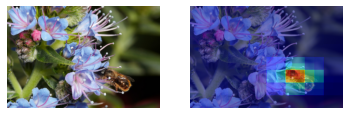

In [14]:
plt.figure()
plt.subplot(1, 2, 1)
plt.imshow(c_img)
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(c_img)
plt.imshow(smap[0][0], cmap='jet', alpha=0.5)
plt.axis('off')

plt.savefig('data/attribution_benchmarks/bee')
plt.show()
plt.close()